In [12]:
from dna_segmentation_benchmark import evaluate_predictors as ep
from enum import Enum

## Config
You have to create your own enum class that maps the integers to your labels. This works with every label you can think of as long as it has an integer mapping.
**YOU MUST DEFINE NONCODING**. \
Furthermore, it is advised for now to also define **EXON** as some evaluation metrics depend on it. \
To select the kind of evaluations you want simply add the corresponding class

In [13]:
class CustomLabelDef(Enum):
    NONCODING = 8
    EXON = 0
    INTRON = 2

chosen_eval_metrics = [ep.EvalMetrics.INDEL, ep.EvalMetrics.SECTION, ep.EvalMetrics.ML, ep.EvalMetrics.FRAMESHIFT]
classes_to_eval = [CustomLabelDef.EXON, CustomLabelDef.INTRON]

In [14]:
example_gt_seq = [8, 8, 8, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 8, 8, 8, 8]
example_pred_seq = [0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8]

## Run the benchmark with your args

In [15]:
evaluation = ep.benchmark_gt_vs_pred_single(gt_labels=example_gt_seq, pred_labels=example_pred_seq, labels=CustomLabelDef,
                                            classes=classes_to_eval,
                                            metrics=chosen_eval_metrics)

In [16]:
evaluation

{'EXON': {'INDEL': {'5_prime_extensions': [array([0, 1, 2])],
   '3_prime_extensions': [array([17, 18])],
   'whole_insertions': [array([ 8,  9, 10, 11])],
   'joined': [],
   '5_prime_deletions': [array([12])],
   '3_prime_deletions': [array([5, 6, 7])],
   'whole_deletions': [array([19, 20])],
   'split': []},
  'SECTION': {'total_gt': 3, 'correct_pred': 0, 'got_all_right': False},
  'ML': {'mcc': np.float64(-0.1),
   'recall': 0.5,
   'precision': 0.4,
   'specificity': np.float64(0.4),
   'f1': 0.4444444444444444},
  'FRAMESHIFT': {'gt_frames': array([inf, inf, inf,  0.,  0., inf, inf, inf, inf, inf, inf, inf, inf,
           0.,  0.,  0.,  0., inf, inf, inf, inf, inf, inf, inf, inf])}},
 'INTRON': {'INDEL': {'5_prime_extensions': [],
   '3_prime_extensions': [],
   'whole_insertions': [array([5, 6, 7]), array([12])],
   'joined': [],
   '5_prime_deletions': [],
   '3_prime_deletions': [],
   'whole_deletions': [array([ 8,  9, 10, 11]), array([17, 18])],
   'split': []},
  'SECTION

## Visualize your section prediction (UNSTABLE)
This currently only works with the exact nucleotide labels from above


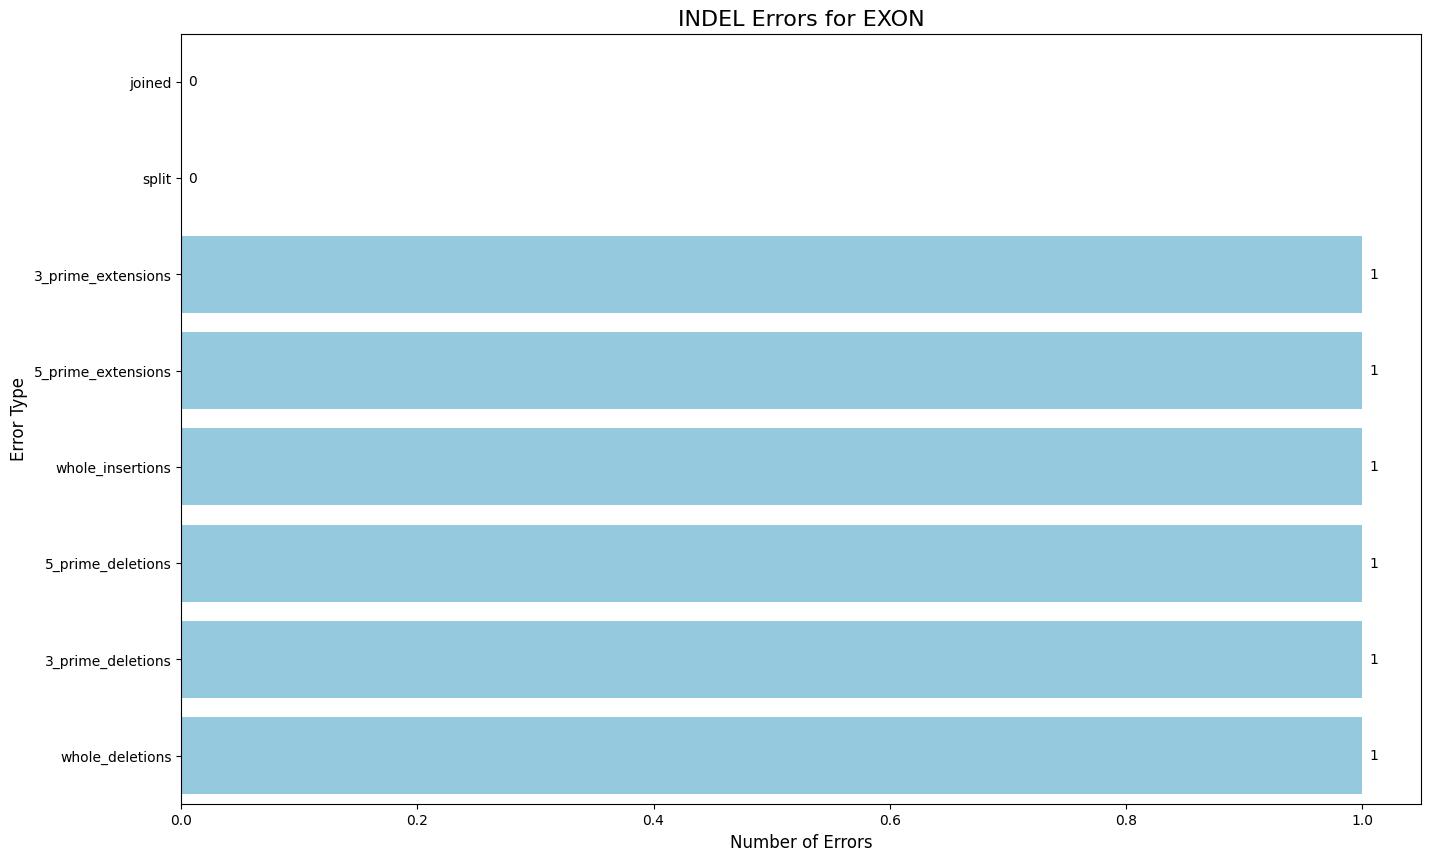

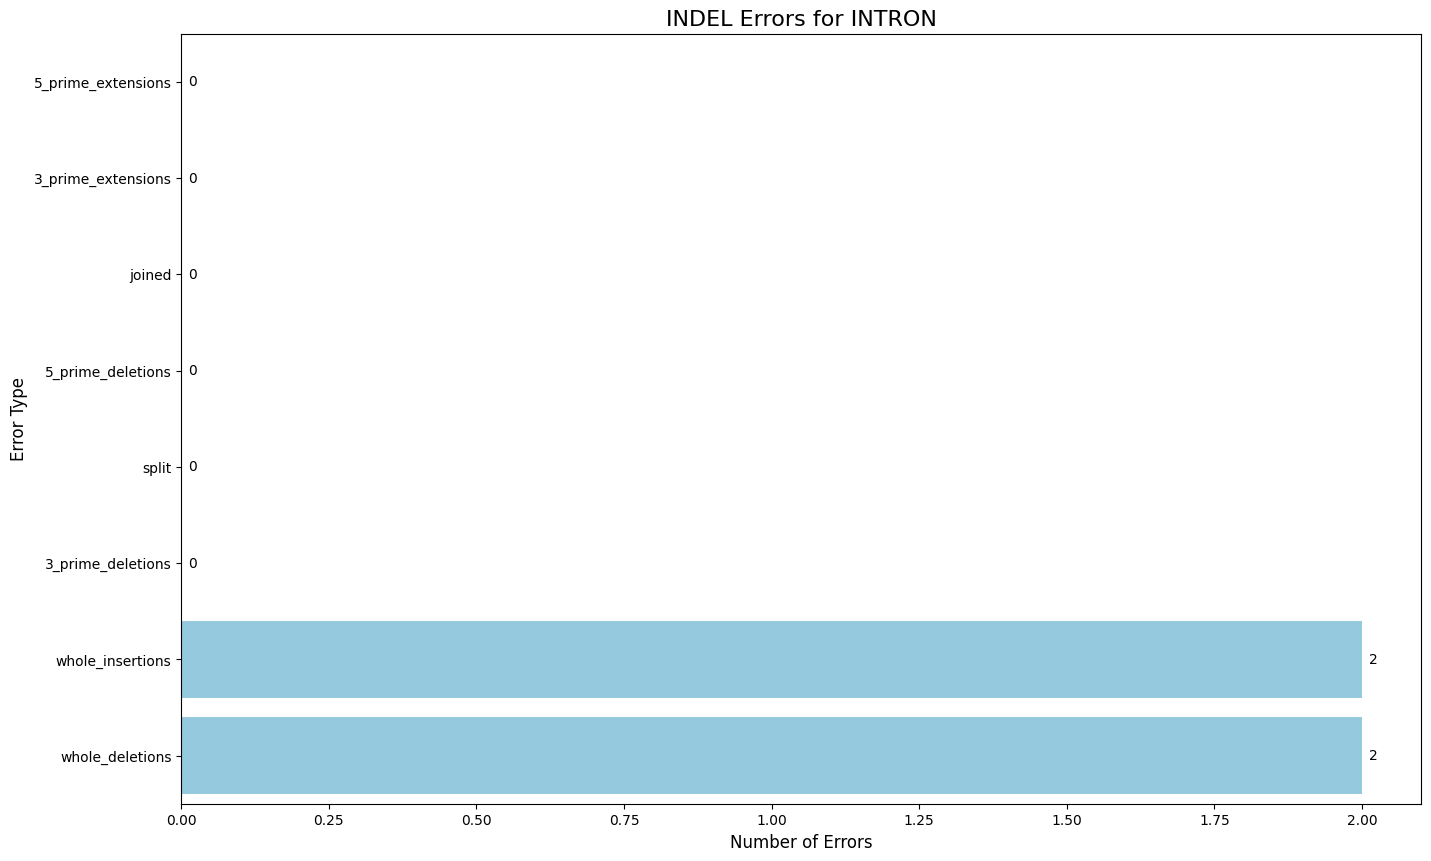

In [18]:
from dna_segmentation_benchmark.single_pred_plotting import plot_pred_vs_gt_enhanced, plot_error_summary_bar


# Example: Plotting INDEL errors if INDEL metric was computed for EXON
if ep.EvalMetrics.INDEL in chosen_eval_metrics:
    for nucleotide_class in classes_to_eval:
        class_indel_errors = evaluation.get(nucleotide_class.name, {}).get(ep.EvalMetrics.INDEL.name, {})
        if class_indel_errors:
            plot_error_summary_bar(class_indel_errors, title=f"INDEL Errors for {nucleotide_class.name}")

# Plotting ground truth vs prediction (assuming gt_annot[0] and pred_annot[0] are label arrays)
# And frameshift data is available if EvalMetrics.FRAMESHIFT was run
gt_frames_for_plot = None
if ep.EvalMetrics.FRAMESHIFT in chosen_eval_metrics:
    frameshift_data = evaluation.get(CustomLabelDef.EXON.name, {}).get(ep.EvalMetrics.FRAMESHIFT.name, {})
    gt_frames_for_plot = frameshift_data.get("gt_frames", None)

plot_pred_vs_gt_enhanced(ground_truth=example_gt_seq,
                         prediction=example_pred_seq,
                         labels=CustomLabelDef,
                         reading_frame=gt_frames_for_plot)